# Decision Tree


For this problem, you will be implementing a Decision Tree classifier that works on discrete (categorical) features. Although a relatively simple learning algorithm, the Decision Tree is often used as a fundamental building block for more powerful (and popular) models such as Random Forest and Gradient Boosted ensembles. 

You should base your solution on the [ID3](https://en.wikipedia.org/wiki/ID3_algorithmhttps://en.wikipedia.org/wiki/ID3_algorithm) algorithm. This is a basic tree-learning algorithm that greedly grows a tree based on _information gain_ (reduction in entropy). Please refer to Chapter 3 of _Machine Learning_ by Tom M. Mitchell for more details. 


We have provided some skeleton code for the classifier, along with a couple of utility functions in the [decision_tree.py](./decision_tree.py) module. Please fill out the functions marked with `TODO` and feel free to add extra constructor arguments as you see fit (just make sure the default constructor solves the first dataset).


In [394]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We begin by loading necessary packages. Below follows a short description of the imported modules:

- `numpy` is the defacto python package for numerical calculation. Most other numerical libraries (including pandas) is based on numpy.
- `pandas` is a widely used package for manipulating (mostly) tabular data
- `decision_tree` refers to the module in this folder that should be further implemented by you

Note: The `%autoreload` statement is an [IPython magic command](https://ipython.readthedocs.io/en/stable/interactive/magics.html) that automatically reloads the newest version of all imported modules within the cell. This means that you can edit the `decision_tree.py` file and just rerun this cell to get the updated version.

In [395]:
%autoreload

import numpy as np 
import pandas as pd 
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import decision_tree as dt  # <-- Your implementation

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## [1] First Dataset

The first dataset is a toy problem lifted from Table 3.2 in the Machine Learning textbook. The objective is to predict whether a given day is suitable for playing tennis based on several weather conditions. 

### [1.1] Load Data

We begin by loading data from the .csv file located in the same folder as this notebook.

In [396]:
data_1 = pd.read_csv('data_1.csv')
data_1

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


### [1.2] Fit and Evaluate Model

Next we fit and evaluate a Decision Tree over the dataset. We first partition the data into the dependent (`y` = Play Tennis) and independent (`X` = everything else) variables. We then initialize a Decision Tree learner and fit it to all the data. Finally, we evaluate the model over the same data by calculating its accuracy, i.e. the fraction of correctly classified samples.

Note that `.fit` and `.predict` will crash until you implement these two methods in [decision_tree.py](./decision_tree.py).

Assuming that you've correctly implemented the ID3 algorithm as described in the course textbook, you should expect the model to perfectly fit the training data. That is, you should get a classification accuracy of 100%.

In [397]:
# Separate independent (X) and dependent (y) variables
X = data_1.drop(columns=['Play Tennis'])
y = data_1['Play Tennis']

# Create and fit a Decrision Tree classifier
model_1 = dt.DecisionTree()  # <-- Should work with default constructor
model_1.fit(X, y)

# Verify that it perfectly fits the training set
print(f'Accuracy: {dt.accuracy(y_true=y, y_pred=model_1.predict(X)) * 100 :.1f}%')


Accuracy: 100.0%


### [1.3] Inspect Classification Rules

A big advantage of Decision Trees is that they are relatively transparent learners. By this we mean that it is easy for an outside observer to analyse and understand how the model makes its decisions. The problem of being able to reason about how a machine learning model reasons is known as _Explainable AI_ and is often a desirable property of machine learning systems.

Every time a Decision Tree is evaluated, the datapoint is compared against a set of nodes starting at the root of the tree and (typically) ending at one of the leaf nodes. An equivalent way to view this reasoning is as an implication rule ($A \rightarrow B$) where the antecedent ($A$) is a conjunction of of attribute values and the consequent ($B$) is the predicted label. For instance, if a path down the tree first checks if Outlook=Rain, then checks if Wind=Strong, and then predicts Play Tennis=No, this line of reasoning can be represented as:

- If $Outlook=Rain \cap Wind=Strong \rightarrow$ then predict $Play Tennis = No$

We will leverage this property to export the decision tree you just created as a set of rules. For the subsequent cell to work, you must also have implemented the `.get_rules()` method in the provided boilerplate code.

In [398]:
for rules, label in model_1.get_rules():
    conjunction = ' ∩ '.join(f'{attr}={value}' for attr, value in rules)
    print(f'{"✅" if label == "Yes" else "❌"} {conjunction} => {label}')

✅ Outlook=Overcast => Yes
❌ Outlook=Rain ∩ Wind=Strong => No
✅ Outlook=Rain ∩ Wind=Weak => Yes
❌ Outlook=Sunny ∩ Humidity=High => No
✅ Outlook=Sunny ∩ Humidity=Normal => Yes


## [2] Second Dataset

The second dataset involves predicting whether an investment opportunity will result in a successful `Outcome` or not. To make this prediction, you are given a dataset of 200 historical$^1$ business ventures and their outcome, along with the following observed features:

- Whether the business oportunity is in a lucurative market or not 
- Whether the presented business idea has a competitive advantage
- Whether the second opinion from another investor is positive or not 
- The founder's previous experience with startups
- The founder's Birth Month.

---
[1] Disclaimer: The dataset is not based on real-world business ventures. It is synthetic and generated by us. Also, it should not be considered financial advice.

### [2.1] Load Data

This dataset can also be found in a .csv file in the same folder as this notebook.

In [399]:
data_2 = pd.read_csv('data_2.csv')
data_2.head(10)
data_2.drop(columns=['Birth Month'], inplace=True) # will not have impact on outcome of model

# One-hot encode categorical variables
#data_2 = dt.oneHotEncode(data_2,y=['Outcome','Split'])

data_2.head(10)

,Founder Experience,Second Opinion,Competitive Advantage,Lucurative Market,Outcome,Split
0,moderate,negative,yes,no,success,train
1,high,positive,yes,no,failure,train
2,low,negative,no,no,failure,train
3,low,negative,no,no,failure,train
4,low,positive,yes,yes,success,train
5,moderate,positive,no,no,failure,train
6,high,negative,no,no,failure,train
7,moderate,negative,no,yes,failure,train
8,high,positive,yes,no,failure,train
9,moderate,negative,no,yes,failure,train


### [2.2] Split Data

We've also taken the liberty to pre-split the dataset into three different sets:

- `train` contains 50 samples that you should use to generate the tree
- `valid` contains 50 samples that you can use to evaluate different preprocessing methods and variations to the tree-learning algorithm.
- `test` contains 100 samples and should only be used to evaluate the final model once you're done experimenting.

In [400]:
data_2_train = data_2[data_2.Split=='train']
data_2_valid = data_2[data_2.Split=='valid']

X_train, y_train = data_2_train.drop(columns=['Outcome', 'Split']), data_2_train.Outcome
X_valid, y_valid = data_2_valid.drop(columns=['Outcome', 'Split']), data_2_valid.Outcome

data_2_final_train = data_2[data_2.Split!='test']
data_2_test = data_2[data_2.Split=='test']

X_final_train, y_final_train = data_2_final_train.drop(columns=['Outcome', 'Split']), data_2_final_train.Outcome
X_test, y_test = data_2_test.drop(columns=['Outcome', 'Split']), data_2_test.Outcome

In [401]:
y_test.value_counts()

Outcome
failure    69
success    31
Name: count, dtype: int64

### [2.3] Fit and Evaluate Model

You may notice that the basic ID3 algorithm you developed for the first dataset does not generalize well when applied straight to this problem. Feel free to add extra functionality to it and/or the data preprocessing pipeline that might improve performance on the validation (and ultimately test set). As a debugging reference; it is highly possible to obtain accuracies over the validation and test set ranging from mid ~80% to low ~90%.

In [402]:
X_valid.shape

(50, 4)

In [403]:
# Fit model (TO TRAIN SET ONLY)

depths = np.arange(1, X_train.shape[1] + 1)
min_samples_splits = np.arange(2, 20)
min_samples_leafs = np.arange(1, 10)

# TODO: remove
#depths = [4]
#min_samples_splits = [2]
#min_samples_leafs = [1]


combinations = list(itertools.product(depths, min_samples_splits, min_samples_leafs))

models = pd.DataFrame()

models['model'] = pd.Series(
    [
        dt.DecisionTree(
            max_depth=depth, 
            min_samples_split=min_samples_split, 
            min_samples_leafs=min_samples_leafs) 
        for depth, min_samples_split, min_samples_leafs in combinations]
    )
models['depth'] = [depth for depth, _, _ in combinations]
models['min_samples_split'] = [min_samples_split for _, min_samples_split, _ in combinations]
models['min_samples_leafs'] = [min_samples_leafs for _, _, min_samples_leafs in combinations]

models['model'].apply(lambda x: x.fit(X_train, y_train))

models['train_accuracy'] = models['model'].apply(lambda x: dt.accuracy(y_train, x.predict(X_train)))
models['valid_accuracy'] = models['model'].apply(lambda x: dt.accuracy(y_valid, x.predict(X_valid)))

#models['model'].apply(lambda x: x.fit(X_final_train, y_final_train)) # TODO: remove
#models['test_accuracy'] = models['model'].apply(lambda x: dt.accuracy(y_test, x.predict(X_test))) # TODO: remove



In [404]:
models_sorted.head()

,model,depth,min_samples_split,min_samples_leafs,train_accuracy,valid_accuracy,test_accuracy_before_relearning,test_accuracy
0,"DecisionTree(max_depth=5, min_samples_split=2,...",5,2,1,0.92,0.9,0.86,0.84
1,"DecisionTree(max_depth=6, min_samples_split=2,...",6,2,1,0.92,0.9,0.86,0.84
2,"DecisionTree(max_depth=7, min_samples_split=2,...",7,2,1,0.92,0.9,0.86,0.84
3,"DecisionTree(max_depth=8, min_samples_split=2,...",8,2,1,0.92,0.9,0.86,0.84
4,"DecisionTree(max_depth=9, min_samples_split=2,...",9,2,1,0.92,0.9,0.86,0.84


In [405]:
print(models_sorted.model.values[0].show_model())
print(models_sorted.model.values[0])

Competitive Advantage_no==, --> failure (100)
	False,Founder Experience_moderate==, --> failure (27)
		False,Lucurative Market_no==, --> failure (11)
			False,Founder Experience_high==, --> success (2)
				False,None, --> success (2)
				True,None, --> failure (0)
			True,Second Opinion_negative==, --> failure (9)
				False,Founder Experience_high==, --> failure (1)
					False,None, --> success (0)
					True,None, --> failure (1)
				True,None, --> failure (8)
		True,Lucurative Market_no==, --> success (16)
			False,None, --> failure (4)
			True,Second Opinion_negative==, --> success (12)
				False,None, --> success (2)
				True,None, --> success (10)
	True,Second Opinion_negative==, --> failure (73)
		False,Founder Experience_low==, --> failure (18)
			False,Founder Experience_high==, --> failure (16)
				False,Lucurative Market_no==, --> failure (8)
					False,None, --> failure (3)
					True,None, --> failure (5)
				True,None, --> failure (8)
			True,Lucurative Market_no==, --> succ

In [406]:
models_sorted = models.sort_values(
    by=['valid_accuracy','depth','min_samples_split','min_samples_leafs'],
    ascending=[False,True,False,False]
    ).reset_index(drop=True)
    
best_model = models_sorted.model.values[0]

print(f'best valid_accuracy: {models_sorted.valid_accuracy.values[0]}')
print(f'worst valid_accuracy: {models_sorted.valid_accuracy.values[-1]}')
display(models_sorted.head(10))



best valid_accuracy: 0.92
worst valid_accuracy: 0.7


,model,depth,min_samples_split,min_samples_leafs,train_accuracy,valid_accuracy
0,"DecisionTree(max_depth=3, min_samples_split=4,...",3,4,1,0.92,0.92
1,"DecisionTree(max_depth=3, min_samples_split=3,...",3,3,1,0.92,0.92
2,"DecisionTree(max_depth=3, min_samples_split=2,...",3,2,1,0.92,0.92
3,"DecisionTree(max_depth=4, min_samples_split=4,...",4,4,1,0.92,0.92
4,"DecisionTree(max_depth=4, min_samples_split=3,...",4,3,1,0.92,0.92
5,"DecisionTree(max_depth=4, min_samples_split=2,...",4,2,1,0.92,0.92
6,"DecisionTree(max_depth=3, min_samples_split=7,...",3,7,1,0.88,0.90
7,"DecisionTree(max_depth=3, min_samples_split=6,...",3,6,1,0.90,0.90
8,"DecisionTree(max_depth=3, min_samples_split=5,...",3,5,1,0.90,0.90
9,"DecisionTree(max_depth=4, min_samples_split=7,...",4,7,1,0.88,0.90


In [407]:
# TODO: REMOVE
models_sorted['test_accuracy_before_relearning'] = models_sorted['model'].apply(lambda x: dt.accuracy(y_test, x.predict(X_test)))

models_sorted['model'].apply(lambda x: x.fit(X_final_train, y_final_train))
models_sorted['test_accuracy'] = models_sorted['model'].apply(lambda x: dt.accuracy(y_test, x.predict(X_test)))

print(f'best test_accuracy: {models_sorted.test_accuracy.max()}')
print(f'worst test_accuracy: {models_sorted.test_accuracy.min()}')


best test_accuracy: 0.88
worst test_accuracy: 0.69


<Axes: xlabel='valid_accuracy', ylabel='test_accuracy'>

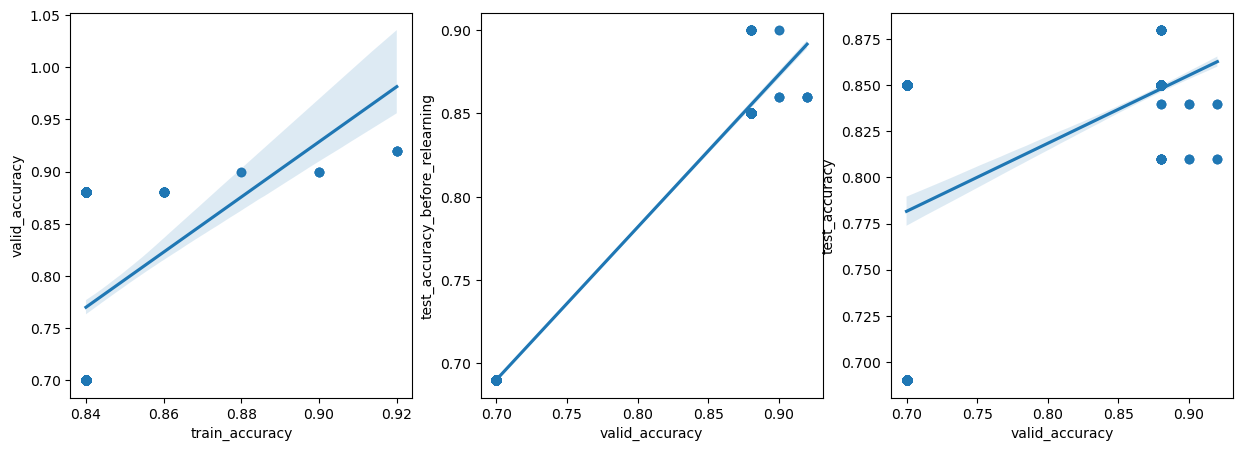

In [408]:
f, ax = plt.subplots(1,3,figsize=(15, 5))

sns.regplot(data=models_sorted, x='train_accuracy', y='valid_accuracy',ax=ax[0])

sns.regplot(data=models_sorted, x='valid_accuracy', y='test_accuracy_before_relearning',ax=ax[1])

sns.regplot(data=models_sorted, x='valid_accuracy', y='test_accuracy',ax=ax[2])

In [409]:
models_sorted.sort_values(by='test_accuracy', ascending=False).head(10)

,model,depth,min_samples_split,min_samples_leafs,train_accuracy,valid_accuracy,test_accuracy_before_relearning,test_accuracy
253,"DecisionTree(max_depth=4, min_samples_split=5,...",4,5,3,0.86,0.88,0.9,0.88
243,"DecisionTree(max_depth=4, min_samples_split=7,...",4,7,3,0.86,0.88,0.9,0.88
254,"DecisionTree(max_depth=4, min_samples_split=5,...",4,5,2,0.86,0.88,0.9,0.88
263,"DecisionTree(max_depth=4, min_samples_split=3,...",4,3,3,0.86,0.88,0.9,0.88
264,"DecisionTree(max_depth=4, min_samples_split=3,...",4,3,2,0.86,0.88,0.9,0.88
249,"DecisionTree(max_depth=4, min_samples_split=6,...",4,6,2,0.86,0.88,0.9,0.88
248,"DecisionTree(max_depth=4, min_samples_split=6,...",4,6,3,0.86,0.88,0.9,0.88
268,"DecisionTree(max_depth=4, min_samples_split=2,...",4,2,3,0.86,0.88,0.9,0.88
259,"DecisionTree(max_depth=4, min_samples_split=4,...",4,4,2,0.86,0.88,0.9,0.88
244,"DecisionTree(max_depth=4, min_samples_split=7,...",4,7,2,0.86,0.88,0.9,0.88


In [410]:
X = pd.concat([X_train, X_valid])
y = pd.concat([y_train, y_valid])

best_model.fit(X, y)

print(f'Accuracy: {dt.accuracy(y_true=y_test, y_pred=best_model.predict(X_test)) * 100 :.1f}%')

Accuracy: 81.0%


In [411]:
# test 
dec_tree = dt.DecisionTree()
dec_tree.fit(X_final_train, y_final_train)
dt.accuracy(y_true=y_test, y_pred=dec_tree.predict(X_test))


0.84

## [3] Further steps (optional)

If you're done with the assignment but want to some more challenges; consider the following:

- Make a Decision Tree learner that can handle numerical attributes
- Make a Decision Tree learner that can handle numerical targets (regresion tree)
- Try implementing [Random Forest](https://en.wikipedia.org/wiki/Random_forest) on top of your Decision Tree algorithm

If you need more data for experimenting, UC Irvine hosts a [large repository](https://archive.ics.uci.edu/ml/datasets.php) of machine learning datasets.
